In [ ]:
# Predicting NBA Salaries using machine learning via AWS softwares
# 1. Data Collection, reformat data to include salary as the last column along with all other items
# 2. Data Cleaning, remove all rows with missing values
# 3. Data Preprocessing, split data into training and testing sets, utilize 2024 free agent list as testing data
# 4. Model Selection, utilize Random Forest Regressor to predict salaries based on player statistics and GP, GS 
# 5. Model Training, train the model on the training data
# 6. Model Evaluation, evaluate model on the testing data
# 7. Model Tuning, tune the model to improve accuracy
# 8. Model Prediction, predict the salaries of the 2024 free agents
# 9. Model Deployment, deploy model to AWS S3 bucket
# 10. Model Monitoring, monitor model performance and update model as needed
# 11. Model Maintenance, maintain model by updating it as needed


# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt






In [3]:

# Importing Data
stats = pd.read_csv('playerstats2425.csv')
salaries = pd.read_csv('salaries2425.csv')

print(stats.head())
print(salaries.head())

    Rk                   Player   Age Team Pos     G    GS      MP     FG  \
0  1.0              Luka Dončić  24.0  DAL  PG  70.0  70.0  2624.0  804.0   
1  2.0  Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  2553.0  796.0   
2  3.0    Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  2567.0  837.0   
3  4.0            Jalen Brunson  27.0  NYK  PG  77.0  77.0  2726.0  790.0   
4  5.0             Nikola Jokić  28.0  DEN   C  79.0  79.0  2737.0  822.0   

      FGA  ...    DRB    TRB    AST    STL   BLK    TOV     PF     PTS  \
0  1652.0  ...  588.0  647.0  686.0   99.0  38.0  282.0  149.0  2370.0   
1  1487.0  ...  350.0  415.0  465.0  150.0  67.0  162.0  184.0  2254.0   
2  1369.0  ...  645.0  841.0  476.0   87.0  79.0  250.0  210.0  2222.0   
3  1648.0  ...  235.0  278.0  519.0   70.0  13.0  186.0  144.0  2212.0   
4  1411.0  ...  753.0  976.0  708.0  108.0  68.0  237.0  194.0  2085.0   

                     Awards  Player-additional  
0         MVP-3CPOY-6ASNBA1          doncil

In [4]:
# Cleaning Stats Data
multi_team_players = stats[stats['Team'].isin(['2TM', '3TM'])]

three_team_players = stats[stats['Team'].isin(['3TM'])]
#print(multi_team_players)
print(three_team_players)

        Rk              Player   Age Team Pos     G   GS     MP     FG    FGA  \
309  254.0       Malachi Flynn  25.0  3TM  PG  69.0  0.0  876.0  136.0  325.0   
379  301.0    Danilo Gallinari  35.0  3TM  SF  49.0  0.0  630.0   83.0  190.0   
425  334.0        Shake Milton  27.0  3TM  SG  48.0  0.0  581.0   79.0  195.0   
478  368.0        Mike Muscala  32.0  3TM   C  53.0  6.0  600.0   56.0  156.0   
537  410.0  Kenneth Lofton Jr.  21.0  3TM  PF  21.0  0.0  199.0   36.0   78.0   
547  417.0      Kira Lewis Jr.  22.0  3TM  PG  28.0  0.0  265.0   34.0   92.0   
604  459.0       Dylan Windler  27.0  3TM  SF  17.0  0.0  108.0   15.0   30.0   

     ...   DRB    TRB    AST   STL   BLK   TOV    PF    PTS  Awards  \
309  ...  93.0  114.0  130.0  38.0   8.0  63.0  66.0  380.0     NaN   
379  ...  88.0  108.0   55.0  14.0   6.0  23.0  50.0  280.0     NaN   
425  ...  61.0   75.0   60.0  19.0   6.0  31.0  54.0  216.0     NaN   
478  ...  86.0  125.0   36.0   9.0  13.0  22.0  52.0  157.0     NaN

In [5]:
for index, row in multi_team_players.iterrows():
    # Find the last team for the player
    player_id = row['Player']
    last_team = stats[(stats['Player'] == player_id) & (stats['Team'] != '2TM')].iloc[-1]['Team']
    
    # Replace '2TM' with the last team
    stats.loc[index, 'Team'] = last_team
    
    # Drop all other rows for the player (keeping only the updated row)
    stats = stats.drop(stats[(stats['Player'] == player_id) & (stats.index != index)].index)
    print(stats)

        Rk                   Player   Age Team  Pos     G    GS      MP  \
0      1.0              Luka Dončić  24.0  DAL   PG  70.0  70.0  2624.0   
1      2.0  Shai Gilgeous-Alexander  25.0  OKC   PG  75.0  75.0  2553.0   
2      3.0    Giannis Antetokounmpo  29.0  MIL   PF  73.0  73.0  2567.0   
3      4.0            Jalen Brunson  27.0  NYK   PG  77.0  77.0  2726.0   
4      5.0             Nikola Jokić  28.0  DEN    C  79.0  79.0  2737.0   
..     ...                      ...   ...  ...  ...   ...   ...     ...   
731  569.0           Ron Harper Jr.  23.0  TOR   PF   1.0   0.0     4.0   
732  570.0           Justin Jackson  28.0  MIN   SF   2.0   0.0     1.0   
733  571.0        Dmytro Skapintsev  25.0  NYK    C   2.0   0.0     2.0   
734  572.0            Javonte Smart  24.0  PHI   PG   1.0   0.0     1.0   
735    NaN           League Average   NaN  NaN  NaN   NaN   NaN     NaN   

        FG     FGA  ...    DRB    TRB    AST    STL   BLK    TOV     PF  \
0    804.0  1652.0  ... 

In [6]:
remaining_multi_team = stats[stats['Team'].isin(['2TM', '3TM'])]
# 1. Check if there are any remaining multi-team entries
if remaining_multi_team.empty:
    print("Success! No '2TM' or '3TM' entries left.")
else:
    print("There are still multi-team entries:")
    print(remaining_multi_team)

# 2. Verify by inspecting specific players who had multiple teams
player_rows = stats[stats['Player'] == 'Danilo Gallinari']

# Display the rows to ensure only the correct team remains
print(player_rows)

Success! No '2TM' or '3TM' entries left.
        Rk            Player   Age Team Pos     G   GS     MP    FG    FGA  \
379  301.0  Danilo Gallinari  35.0  MIL  SF  49.0  0.0  630.0  83.0  190.0   

     ...   DRB    TRB   AST   STL  BLK   TOV    PF    PTS  Awards  \
379  ...  88.0  108.0  55.0  14.0  6.0  23.0  50.0  280.0     NaN   

     Player-additional  
379          gallida01  

[1 rows x 32 columns]


In [7]:
# Cleaning Salaries Data
sal = salaries[['Player', 'Team', '2024-25', 'Guaranteed', 'PlayerID']]
# Clean salaries
sal = sal.rename(columns={'2024-25': 'Salary'})
sal['Salary'] = sal['Salary'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
sal['Guaranteed'] = sal['Guaranteed'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

print(sal)


                    Player Team      Salary   Guaranteed   PlayerID
0            Stephen Curry  GSW  55761216.0  115368033.0  curryst01
1             Nikola Jokić  DEN  51415938.0  165673578.0  jokicni01
2              Joel Embiid  PHI  51415938.0  106640464.0  embiijo01
3             Kevin Durant  PHO  51179021.0  105887630.0  duranke01
4             Bradley Beal  PHO  50203930.0  103870200.0   bealbr01
..                     ...  ...         ...          ...        ...
422           Juwan Morgan  IND    576229.0     576229.0  morgaju01
423            Malik Fitts  IND    555216.0     555216.0  fittsma01
424         Jordan Goodwin  BRK    325590.0     325590.0  goodwjo01
425           Didi Louzada  POR    268032.0    1340160.0  louzama01
426  Javon Freeman-Liberty  TOR    100000.0     100000.0  freemja01

[427 rows x 5 columns]


In [8]:







# Merge Stats and Salaries Data
data = pd.merge(stats, sal, left_on='Player-additional', right_on='PlayerID', how='inner')
# Clean up the data by dropping unnecessary columns
data = data.drop(columns=['Player-additional', 'Player_y', 'Team_y'])
data = data.rename(columns={'Player_x': 'Player'})
data = data.rename(columns={'Team_x': 'Team'})
print(data.head())
print(data.columns)

    Rk                   Player   Age Team Pos     G    GS      MP     FG  \
0  1.0              Luka Dončić  24.0  DAL  PG  70.0  70.0  2624.0  804.0   
1  2.0  Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  2553.0  796.0   
2  3.0    Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  2567.0  837.0   
3  4.0            Jalen Brunson  27.0  NYK  PG  77.0  77.0  2726.0  790.0   
4  5.0             Nikola Jokić  28.0  DEN   C  79.0  79.0  2737.0  822.0   

      FGA  ...    AST    STL   BLK    TOV     PF     PTS  \
0  1652.0  ...  686.0   99.0  38.0  282.0  149.0  2370.0   
1  1487.0  ...  465.0  150.0  67.0  162.0  184.0  2254.0   
2  1369.0  ...  476.0   87.0  79.0  250.0  210.0  2222.0   
3  1648.0  ...  519.0   70.0  13.0  186.0  144.0  2212.0   
4  1411.0  ...  708.0  108.0  68.0  237.0  194.0  2085.0   

                     Awards      Salary   Guaranteed   PlayerID  
0         MVP-3CPOY-6ASNBA1  43031940.0   89031600.0  doncilu01  
1   MVP-2DPOY-7CPOY-3ASNBA1  35859950.0  114

In [9]:
# Looking at the data
print(data.describe())

               Rk         Age           G          GS           MP  \
count  378.000000  378.000000  378.000000  378.000000   378.000000   
mean   211.484127   25.777778   57.682540   30.648148  1403.791005   
std    139.246098    4.400185   19.869595   28.413217   779.753328   
min      1.000000   19.000000    1.000000    0.000000     4.000000   
25%     95.250000   22.000000   47.000000    3.000000   743.000000   
50%    195.500000   25.000000   62.000000   22.000000  1444.000000   
75%    311.750000   28.000000   73.750000   58.000000  2040.000000   
max    569.000000   39.000000   84.000000   82.000000  2989.000000   

               FG          FGA         FG%          3P         3PA  ...  \
count  378.000000   378.000000  377.000000  378.000000  378.000000  ...   
mean   252.097884   528.269841    0.472531   76.179894  207.066138  ...   
std    189.119903   387.130532    0.080812   67.176314  173.285855  ...   
min      0.000000     0.000000    0.167000    0.000000    0.000000  .

In [10]:
# Look at top salaries
top_salaries = data.sort_values(by='Salary', ascending=False)
top_salaries.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Awards,Salary,Guaranteed,PlayerID
9,10.0,Stephen Curry,35.0,GSW,PG,74.0,74.0,2421.0,650.0,1445.0,...,379.0,54.0,28.0,210.0,117.0,1956.0,CPOY-1ASNBA3,55761216.0,115368033.0,curryst01
47,48.0,Joel Embiid,29.0,PHI,C,39.0,39.0,1309.0,450.0,851.0,...,219.0,46.0,66.0,150.0,112.0,1353.0,AS,51415938.0,106640464.0,embiijo01
4,5.0,Nikola Jokić,28.0,DEN,C,79.0,79.0,2737.0,822.0,1411.0,...,708.0,108.0,68.0,237.0,194.0,2085.0,MVP-1CPOY-4ASNBA1,51415938.0,165673578.0,jokicni01
6,7.0,Kevin Durant,35.0,PHO,PF,75.0,75.0,2791.0,751.0,1436.0,...,378.0,69.0,91.0,244.0,133.0,2032.0,MVP-9ASNBA2,51179021.0,105887630.0,duranke01
100,102.0,Bradley Beal,30.0,PHO,SG,53.0,53.0,1767.0,377.0,735.0,...,265.0,52.0,27.0,131.0,127.0,964.0,NaN,50203930.0,103870200.0,bealbr01


In [11]:
# Save to CSV
data.to_csv('nba_data.csv', index=False)

Text(0, 0.5, 'Frequency')

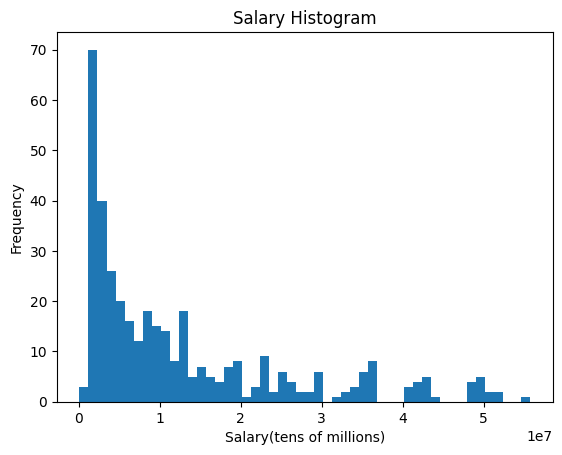

In [12]:
import matplotlib.pyplot as plt
import statistics as stat
plt.hist(data['Salary'], bins=50)
plt.title('Salary Histogram')
plt.xlabel('Salary(tens of millions)')
plt.ylabel('Frequency')

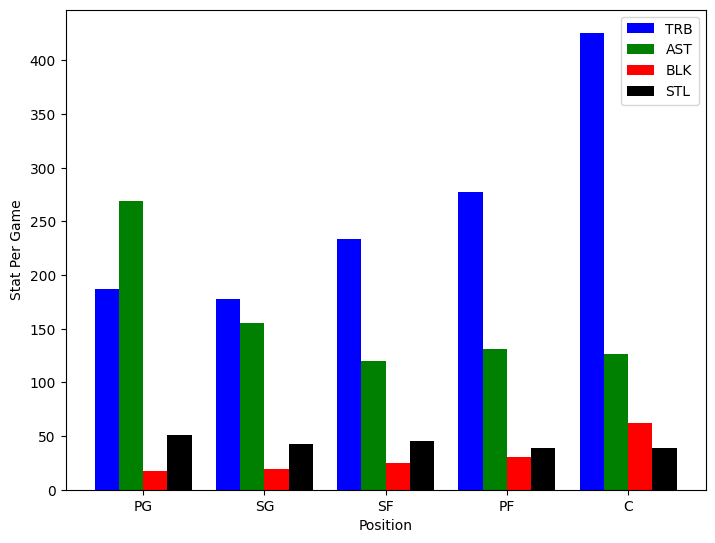

In [13]:
dataPG = data[data['Pos'] == 'PG']
dataSG = data[data['Pos'] == 'SG']
dataSF = data[data['Pos'] == 'SF']
dataPF = data[data['Pos'] == 'PF']
dataC = data[data['Pos'] == 'C']

avgTRB = [stat.mean(dataPG['TRB']),stat.mean(dataSG['TRB']),stat.mean(dataSF['TRB']),stat.mean(dataPF['TRB']),stat.mean(dataC['TRB'])]
avgAST = [stat.mean(dataPG['AST']),stat.mean(dataSG['AST']),stat.mean(dataSF['AST']),stat.mean(dataPF['AST']),stat.mean(dataC['AST'])]
avgBLK = [stat.mean(dataPG['BLK']),stat.mean(dataSG['BLK']),stat.mean(dataSF['BLK']),stat.mean(dataPF['BLK']),stat.mean(dataC['BLK'])]
avgSTL = [stat.mean(dataPG['STL']),stat.mean(dataSG['STL']),stat.mean(dataSF['STL']),stat.mean(dataPF['STL']),stat.mean(dataC['STL'])]

avg = [avgTRB, avgAST, avgBLK, avgSTL]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.3, avg[0], color = 'b', width = 0.2, label='TRB')
ax.bar(X - 0.1, avg[1], color = 'g', width = 0.2, label='AST')
ax.bar(X + 0.1, avg[2], color = 'r', width = 0.2, label='BLK')
ax.bar(X + 0.3, avg[3], color = 'k', width = 0.2, label='STL')
plt.xlabel('Position')
plt.ylabel('Stat Per Game')
plt.xticks([0, 1, 2, 3, 4], ['PG', 'SG', 'SF', 'PF', 'C'])
plt.legend()
plt.show()

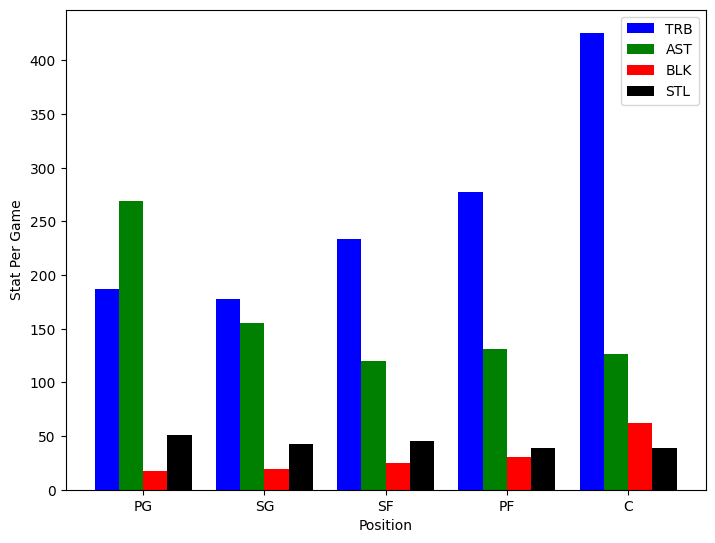

In [14]:
avgTRB = [stat.mean(dataPG['TRB']),stat.mean(dataSG['TRB']),stat.mean(dataSF['TRB']),stat.mean(dataPF['TRB']),stat.mean(dataC['TRB'])]
avgAST = [stat.mean(dataPG['AST']),stat.mean(dataSG['AST']),stat.mean(dataSF['AST']),stat.mean(dataPF['AST']),stat.mean(dataC['AST'])]
avgBLK = [stat.mean(dataPG['BLK']),stat.mean(dataSG['BLK']),stat.mean(dataSF['BLK']),stat.mean(dataPF['BLK']),stat.mean(dataC['BLK'])]
avgSTL = [stat.mean(dataPG['STL']),stat.mean(dataSG['STL']),stat.mean(dataSF['STL']),stat.mean(dataPF['STL']),stat.mean(dataC['STL'])]

avg = [avgTRB, avgAST, avgBLK, avgSTL]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.3, avg[0], color = 'b', width = 0.2, label='TRB')
ax.bar(X - 0.1, avg[1], color = 'g', width = 0.2, label='AST')
ax.bar(X + 0.1, avg[2], color = 'r', width = 0.2, label='BLK')
ax.bar(X + 0.3, avg[3], color = 'k', width = 0.2, label='STL')
plt.xlabel('Position')
plt.ylabel('Stat Per Game')
plt.xticks([0, 1, 2, 3, 4], ['PG', 'SG', 'SF', 'PF', 'C'])
plt.legend()
plt.show()

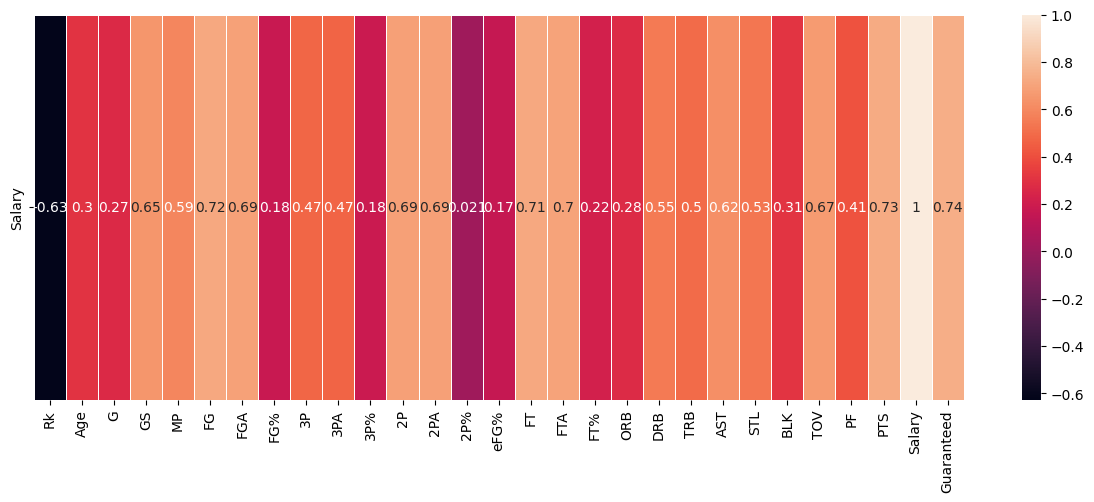

In [15]:
import seaborn as sb
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# Plot the heatmap for 'Salary' correlation
plt.figure(figsize=(15, 5))
sb.heatmap(corr_matrix.loc[['Salary'], :], annot=True, linewidths=.5)
plt.show()

In [16]:
# convert data into per game stats
dataper = data[['Player','Team','Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary']]
dataper['FG'] = dataper['FG'] / dataper['G']
dataper['FGA'] = dataper['FGA'] / dataper['G']
dataper['3P'] = dataper['3P'] / dataper['G']
dataper['3PA'] = dataper['3PA'] / dataper['G']
dataper['2P'] = dataper['2P'] / dataper['G']
dataper['2PA'] = dataper['2PA'] / dataper['G']
dataper['FT'] = dataper['FT'] / dataper['G']
dataper['FTA'] = dataper['FTA'] / dataper['G']
dataper['ORB'] = dataper['ORB'] / dataper['G']
dataper['DRB'] = dataper['DRB'] / dataper['G']
dataper['TRB'] = dataper['TRB'] / dataper['G']
dataper['AST'] = dataper['AST'] / dataper['G']
dataper['STL'] = dataper['STL'] / dataper['G']
dataper['BLK'] = dataper['BLK'] / dataper['G']
dataper['TOV'] = dataper['TOV'] / dataper['G']
dataper['PF'] = dataper['PF'] / dataper['G']
dataper['PTS'] = dataper['PTS'] / dataper['G']
dataper['MP'] = dataper['MP'] / dataper['G']

dataper.head()

C:\Users\aadis\AppData\Local\Temp\ipykernel_19816\2999718008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataper['FG'] = dataper['FG'] / dataper['G']
C:\Users\aadis\AppData\Local\Temp\ipykernel_19816\2999718008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataper['FGA'] = dataper['FGA'] / dataper['G']
C:\Users\aadis\AppData\Local\Temp\ipykernel_19816\2999718008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Player,Team,Pos,Age,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Luka Dončić,DAL,PG,24.0,70.0,70.0,37.485714,11.485714,23.600000,0.487,...,0.842857,8.400000,9.242857,9.800000,1.414286,0.542857,4.028571,2.128571,33.857143,43031940.0
1,Shai Gilgeous-Alexander,OKC,PG,25.0,75.0,75.0,34.040000,10.613333,19.826667,0.535,...,0.866667,4.666667,5.533333,6.200000,2.000000,0.893333,2.160000,2.453333,30.053333,35859950.0
2,Giannis Antetokounmpo,MIL,PF,29.0,73.0,73.0,35.164384,11.465753,18.753425,0.611,...,2.684932,8.835616,11.520548,6.520548,1.191781,1.082192,3.424658,2.876712,30.438356,48787676.0
3,Jalen Brunson,NYK,PG,27.0,77.0,77.0,35.402597,10.259740,21.402597,0.479,...,0.558442,3.051948,3.610390,6.740260,0.909091,0.168831,2.415584,1.870130,28.727273,24960001.0
4,Nikola Jokić,DEN,C,28.0,79.0,79.0,34.645570,10.405063,17.860759,0.583,...,2.822785,9.531646,12.354430,8.962025,1.367089,0.860759,3.000000,2.455696,26.392405,51415938.0


In [17]:
# Save to CSV
dataper.to_csv('nba_dataPG.csv', index=False)